In [3]:
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_bloch_multivector ,plot_histogram
from numpy import pi
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.primitives import BackendSamplerV2
import matplotlib.pyplot as plt
from qiskit.primitives import StatevectorSampler

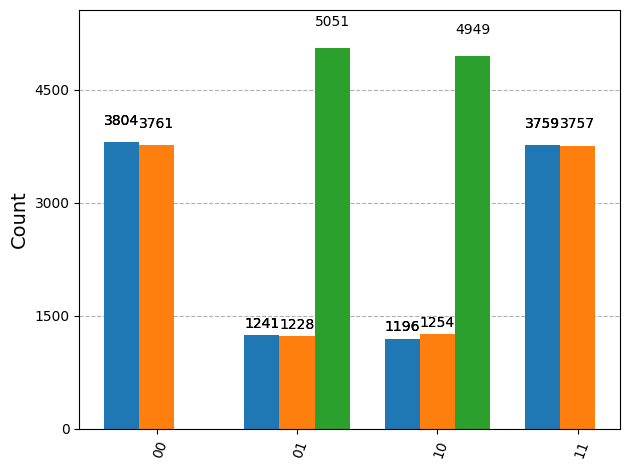

In [4]:
qcs=[QuantumCircuit(2,2),QuantumCircuit(2,2),QuantumCircuit(2,2)]
for i in range(0,len(qcs)):
    qcs[i].x([0,1])
    qcs[i].h(0)
    qcs[i].cx(0,1)

qcs[0].ry(-2*pi/3,1)
qcs[1].ry(-4*pi/3,1)
qcs[2].ry(-2*pi/3,1)
qcs[2].ry(-4*pi/3,1)

for i in range(0,len(qcs)):
    qcs[i].barrier()
    qcs[i].measure([0,1],[0,1])

counts_list = [None]*len(qcs)

sampler = StatevectorSampler()
 
# Start a job that will return shots for all 100 parameter value sets.
for i in range(0,len(qcs)):
    pub = (qcs[i])
    job = sampler.run([pub], shots=10000) 
    # Extract the result for the 0th pub (this example only has one pub).
    result = job.result()
    data_pub = result[0].data
    counts = data_pub.c.get_counts()
    counts_list[i]=counts
#    plot_histogram(counts)

plot_histogram(counts_list)